In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Relevant ML Libraries**

In [ ]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
import sklearn.metrics as metrics
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import ADASYN

**Importing Relevant ML MODELS**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier

**Importing the libraries for hypothesis testing**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
churn_data = pd.read_csv('Telco_customer_churn.csv')
churn_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# **Exploratory Data Analysis (EDA)**

**Determining the data frame's shape and list its data types to see if there is any need for data cleaning**

In [ ]:
churn_data.shape
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

*Findings: The **total charges column** has a data type of an object instead of a float. This must be converted.*

In [ ]:
churn_data['Total Charges'] = pd.to_numeric(churn_data['Total Charges'], errors='coerce')

**Determining if the data has any null value**

In [ ]:
churn_data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

*Findings: There are **11 missing values in the Total Charge column**, which is very insignificant compared with the total number of entries. Therefore these missing values will be dropped.*

In [ ]:
# Removing missing value
churn_data.dropna(inplace=True)

**Determining if the data frame has any duplicates.**

In [ ]:
churn_data.duplicated().sum()

0

**The next step in our EDA is removing id columns as they are irrelevant to the project.**

In [ ]:
# removing ID column
churn_data = churn_data.iloc[:,1:]

**Looking at the number of unique values in each column**

In [ ]:
for column in churn_data.columns:
  print(column, ':', churn_data[column].nunique())

Count : 1
Country : 1
State : 1
City : 833
Zip Code : 1190
Lat Long : 1190
Latitude : 1190
Longitude : 1190
Gender : 2
Senior Citizen : 2
Partner : 2
Dependents : 2
Tenure Months : 72
Phone Service : 2
Multiple Lines : 3
Internet Service : 3
Online Security : 3
Online Backup : 3
Device Protection : 3
Tech Support : 3
Streaming TV : 3
Streaming Movies : 3
Contract : 3
Paperless Billing : 2
Payment Method : 4
Monthly Charges : 910
Total Charges : 1732
Churn Label : 1
Churn Value : 1
Churn Score : 36
CLTV : 1487
Churn Reason : 20


**Loading the one hot encoder to convert categorical values into numerical values in the preprocessing stage before creating machine learning modules.**

In [ ]:
churn_data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,1869.0,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.0,1869.000000,1869.000000
mean,1.0,93532.352595,36.268614,-119.782388,17.979133,74.441332,1531.796094,1.0,82.510433,4149.414660
std,0.0,1858.939970,2.473911,2.163024,19.531123,24.666053,1890.822994,0.0,10.328570,1189.370707
min,1.0,90001.000000,32.555828,-124.301372,1.000000,18.850000,18.850000,1.0,65.000000,2003.000000
25%,1.0,92105.000000,34.038983,-121.799917,2.000000,56.150000,134.500000,1.0,74.000000,3101.000000
50%,1.0,93554.000000,36.298780,-119.711868,10.000000,79.650000,703.550000,1.0,82.000000,4238.000000
75%,1.0,95358.000000,38.200231,-118.020188,29.000000,94.200000,2331.300000,1.0,91.000000,5166.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.350000,8684.800000,1.0,100.000000,6484.000000


From here we get that, the mean monthly charges are 74.441332, the minimum value is 18.85, and the maximum value within this column is 118.35.

The mean tenure is 17.979133, the minimum value is 1, and the maximum value within this column is 72.

The mean total charges are 1531.796094, the minimum value is 18.85, and the maximum value within this column is 8684.80.

**Distribution of Monthly Charges**

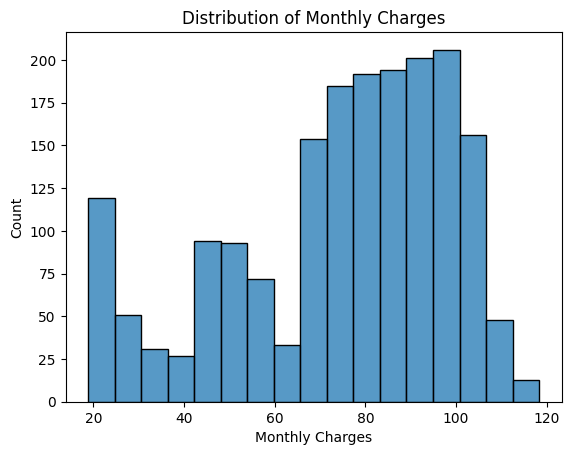

In [ ]:
sns.histplot(x = 'Monthly Charges', data = churn_data).set(title = 'Distribution of Monthly Charges')
plt.show()

Results: Most customers are charged $100. And, the distribution of monthly charges is skewed to the left. Apart from $100, most customers are charged between $75 to $110.


**Distribution of Customer Tenure**

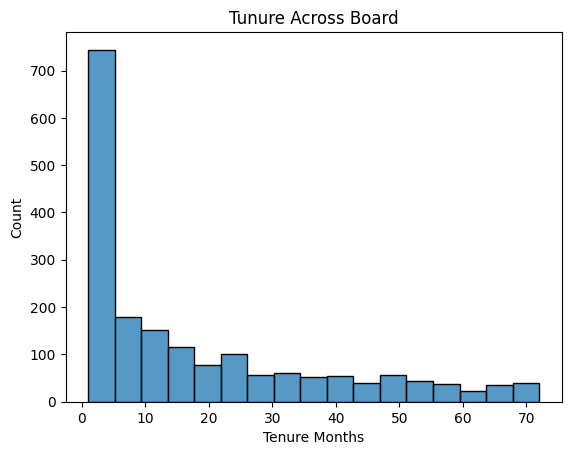

In [ ]:
sns.histplot(x = 'Tenure Months', data = churn_data).set(title = 'Tunure Across Board')
plt.show()

Results: Most customers only last 0-15 months.

**Distribution of Total Charges**

[Text(0.5, 1.0, 'Distribution of Total Charges')]

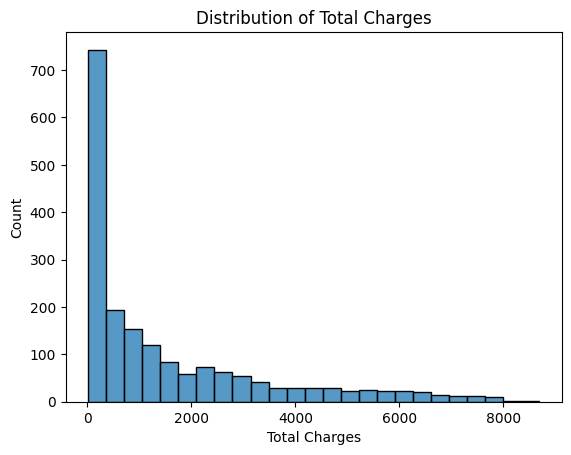

In [ ]:
sns.histplot(x = 'Total Charges', data = churn_data).set(title = 'Distribution of Total Charges')

Results: Customer frequency decreases with an increase in total charges. The relationship between customer frequency and total charges exhibits an intriguing pattern. As the total charges increase, there is a notable decrease in customer frequency.
And,  as the total charges increases, customers may perceive the products or services as less affordable or less aligned with their budgetary constraints. This perception can discourage them from engaging with the business as frequently as before.

**Count of Customers Paperless Billing**

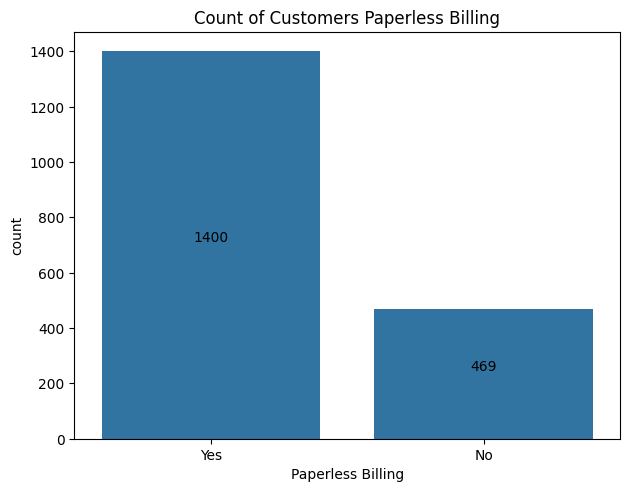

In [ ]:
# nOt iNTERESTED
ax = sns.countplot(x='Paperless Billing',data=churn_data)
vc = churn_data['Paperless Billing'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()

    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired

    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers Paperless Billing')
plt.show()

# **Count of Churn Customers**

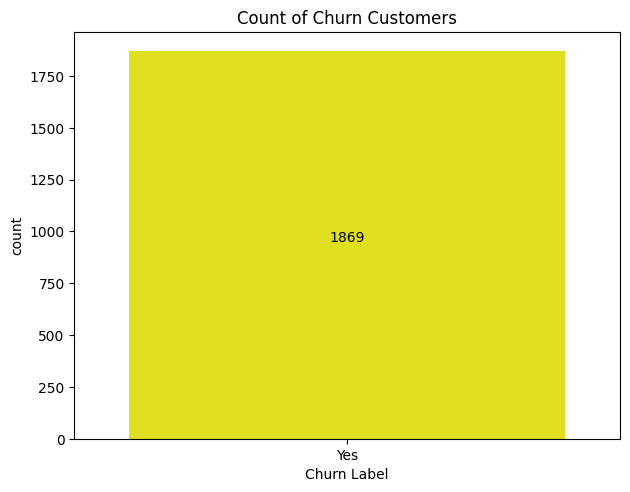

In [ ]:
ax = sns.countplot(x='Churn Label',data=churn_data, hue='Churn Label', palette={'Yes': 'Yellow', 'No': 'Purple'})
vc = churn_data['Churn Label'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()

    # Formatting the text to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired

    # Adding the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Churn Customers')
plt.show()

# **Count of Gender**

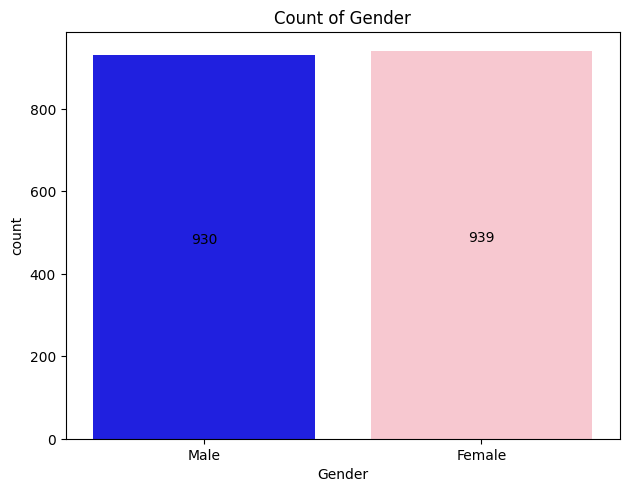

In [ ]:
ax = sns.countplot(x='Gender',data=churn_data, hue='Gender', palette={'Male': 'blue', 'Female': 'pink'})
vc = churn_data['Gender'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()

    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired

    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Gender')
plt.show()

# **Distribution of Customers with Partner**

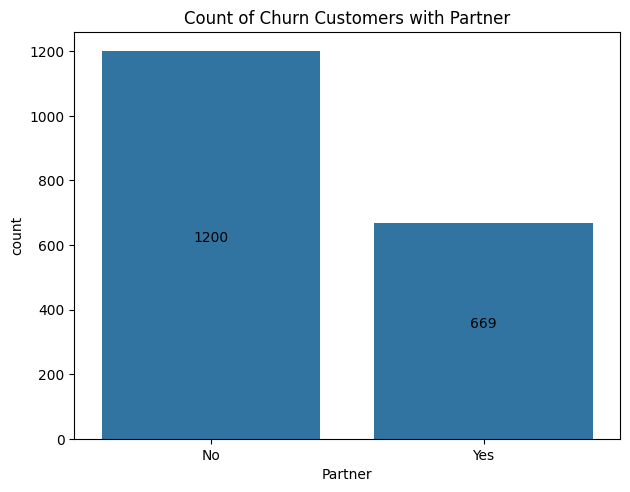

In [ ]:
#determine the number of clients with and without partners.
ax = sns.countplot(x='Partner',data=churn_data)
vc = churn_data['Partner'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()

    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired

    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Churn Customers with Partner')
plt.show()

Results: The difference between customers with partners and those without partners is 531, which is approximately 28.41% of all churn customers.

# **Distribution of Customers with Dependents**

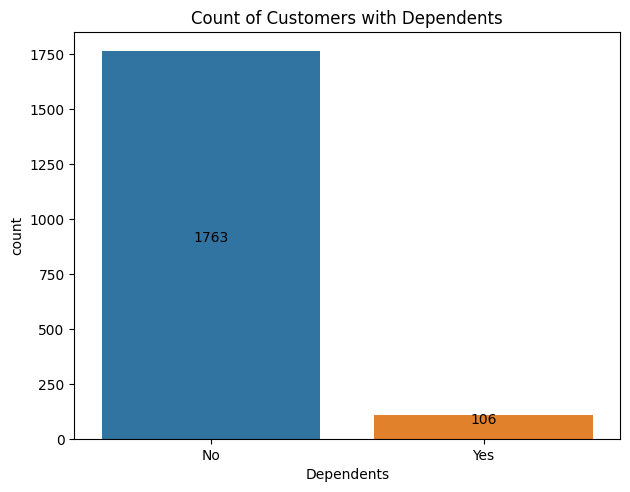

In [ ]:
ax = sns.countplot(x='Dependents',data=churn_data)
vc = churn_data['Dependents'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()

    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired

    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers with Dependents')
plt.show()

# **Distribution of Senior Citizens**

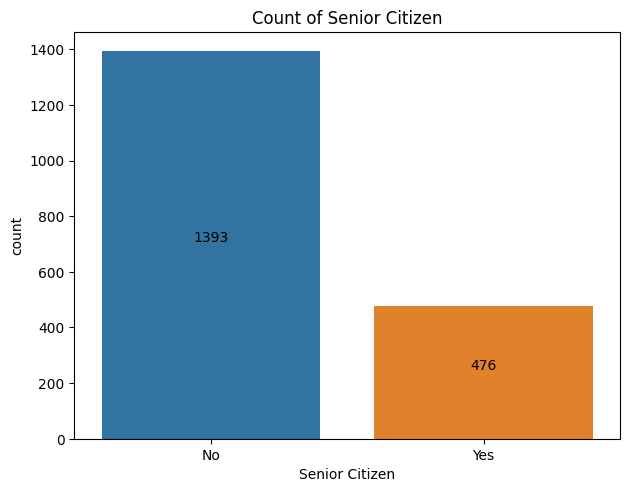

In [ ]:
ax = sns.countplot(x='Senior Citizen', data=churn_data)
vc = churn_data['Senior Citizen'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()

    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired

    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Senior Citizen')
plt.show()

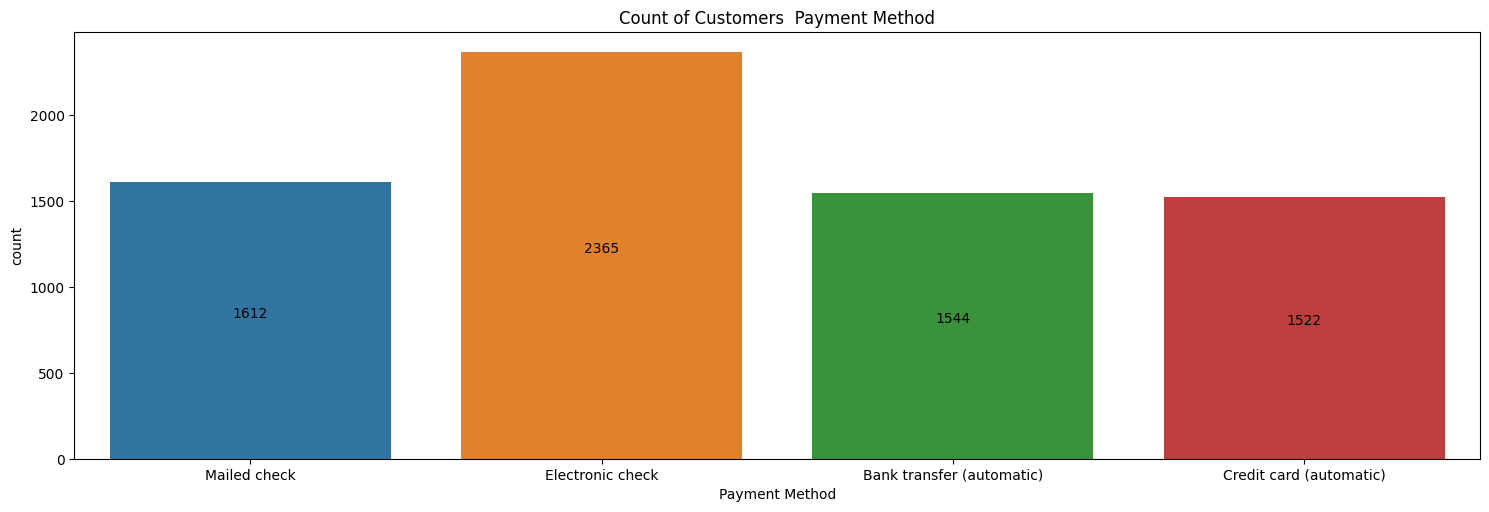

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Payment Method',data=churn_data)
vc = churn_data['Payment Method'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()

    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired

    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers  Payment Method')
plt.show()

**Count of Different types of Customers  Contract**

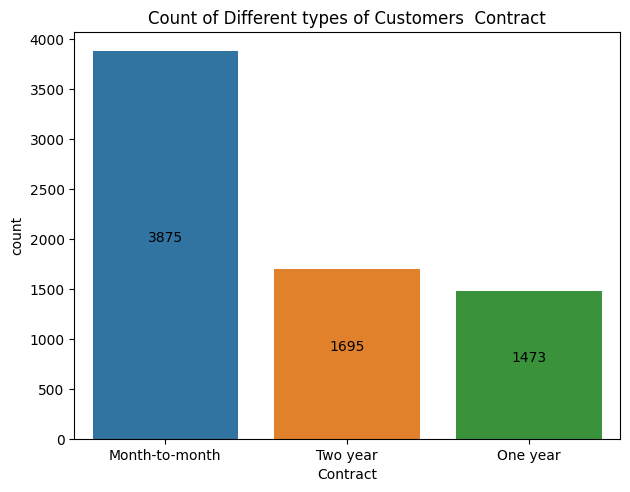

In [ ]:
ax = sns.countplot(x='Contract',data=churn_data)
vc = churn_data['Contract'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()

    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired

    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Different types of Customers  Contract')
plt.show()

In [ ]:
LE = LabelEncoder()
#churn_data['Gender'] = LE.fit_transform(churn_data['Gender'])
churn_data['Partner'] = LE.fit_transform(churn_data['Partner'])
churn_data['Dependents'] = LE.fit_transform(churn_data['Dependents'])
churn_data['Phone Service'] = LE.fit_transform(churn_data['Phone Service'])
churn_data['Multiple Lines'] = LE.fit_transform(churn_data['Multiple Lines'])
churn_data['Internet service'] = LE.fit_transform(churn_data['Internet Service'])
churn_data['Online Security'] = LE.fit_transform(churn_data['Online Security'])
churn_data['Online Backup'] = LE.fit_transform(churn_data['Online Backup'])
churn_data['Device Protection'] = LE.fit_transform(churn_data['Device Protection'])
churn_data['Tech Support'] = LE.fit_transform(churn_data['Tech Support'])
churn_data['Streaming TV'] = LE.fit_transform(churn_data['Streaming TV'])
churn_data['Streaming Movies'] = LE.fit_transform(churn_data['Streaming Movies'])
churn_data['Contract'] = LE.fit_transform(churn_data['Contract'])
churn_data['Paperless Billing'] = LE.fit_transform(churn_data['Paperless Billing'])
churn_data['Payment Method'] = LE.fit_transform(churn_data['Payment Method'])

<ipython-input-58-a8f2df47ca5e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = churn_data.corr()


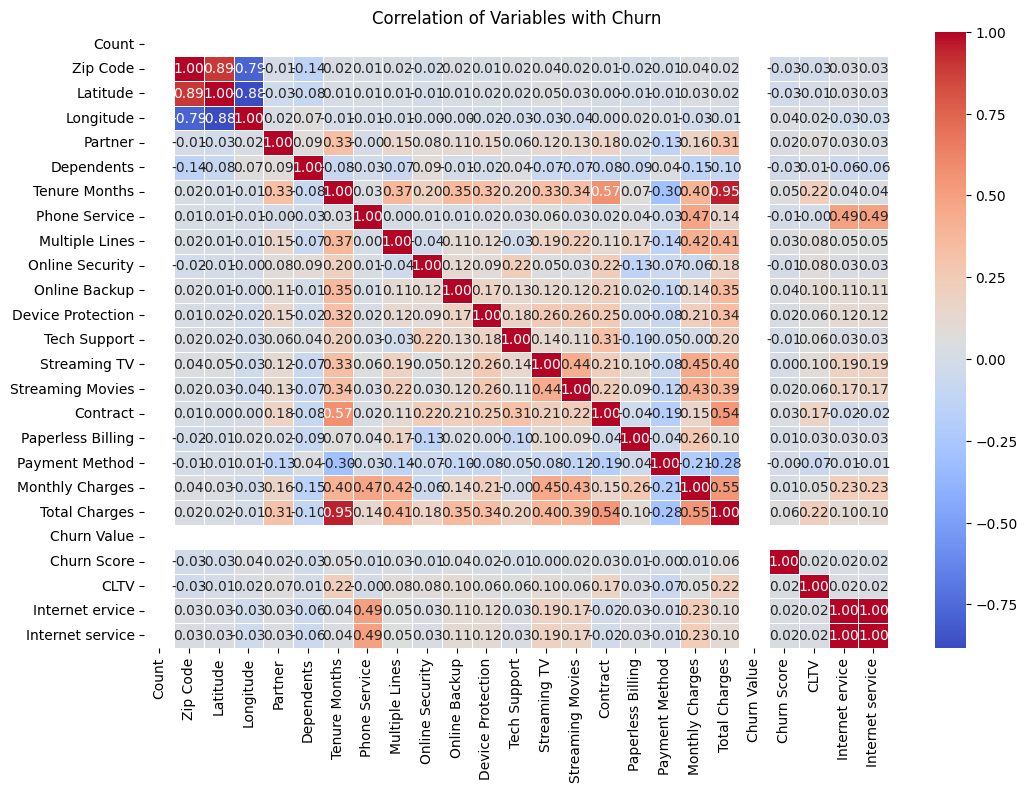

In [ ]:
# Compute correlation matrix
correlation_matrix = churn_data.corr()


# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Variables with Churn')
plt.show()

Results: The illustration show the correlation between the different variables in the dataset.